There is a negative linear relationship between average fare and total number of rides per city. This makes sense because in rural areas, people may need to travel longer distances and therefore higher fares.
Eighty seven percent of all drivers in Pyber are based in urban areas. 
Total rides and total fares by city type are very similary distributed. Even though there are many more total rides in urban areas this means that the average fare per ride is lower.

In [16]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)


# Combine the data into a single dataset
merge_df = pd.merge(city_df, ride_df, on="city", how="outer")


# Display the data table for preview
merge_df.head(5)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

Text(45,30,'Note: Circle size correlates with driver count per city')

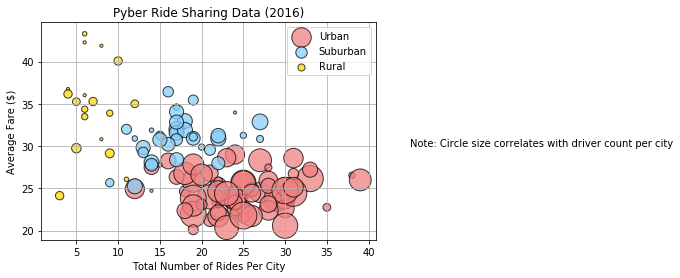

In [97]:
# Obtain the x and y coordinates for each of the three city types
urban = merge_df[merge_df["type"]=="Urban"]
suburban = merge_df[merge_df["type"]=="Suburban"]
rural = merge_df[merge_df["type"]=="Rural"]

rides_urban = urban.groupby(["city"]).count()["ride_id"]
fares_urban = urban.groupby(["city"]).mean()["fare"]
drivers_urban = urban.groupby(["city"]).mean()["driver_count"]

rides_suburban = suburban.groupby(["city"]).count()["ride_id"]
fares_suburban = suburban.groupby(["city"]).mean()["fare"]
drivers_suburban = suburban.groupby(["city"]).mean()["driver_count"]

rides_rural = rural.groupby(["city"]).count()["ride_id"]
fares_rural = rural.groupby(["city"]).mean()["fare"]
drivers_rural = rural.groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city types
plt.scatter(rides_urban, fares_urban, marker="o", facecolors="lightcoral", edgecolors="black",
            s=10*drivers_urban, alpha=0.75, label="Urban")

plt.scatter(rides_suburban, fares_suburban, marker="o", facecolors="lightskyblue", edgecolors="black",
            s=10*drivers_suburban, alpha=0.75, label="Suburban")

plt.scatter(rides_rural, fares_rural, marker="o", facecolors="gold", edgecolors="black",
            s=10*drivers_rural, alpha=0.75, label="Rural")

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($)")
# Create a legend
plt.legend(scatterpoints=1, loc="best")

# Incorporate a text label regarding circle size
plt.text(45, 30, "Note: Circle size correlates with driver count per city")

# Save Figure


## Total Fares by City Type

In [44]:
#Create df to combine type and fare 
fare_df = merge_df.groupby('type')["fare"].sum().reset_index()
fare_df.head()

,type,fare
0,Rural,4327.93
1,Suburban,19356.33
2,Urban,39854.38


Text(0.5,1,'Total Fares by City Type')

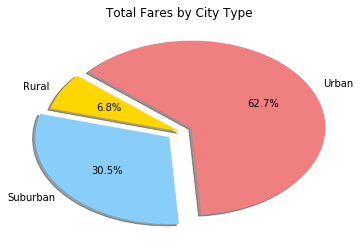

In [66]:
# Calculate Type Percents
labels = fare_df["type"]
fares = fare_df["fare"]
# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0.1, 0.1)
plt.pie(fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Fares by City Type")
# Save Figure


## Total Rides by City Type

In [98]:
#Create df to combine type and fare 
ride_type_df = merge_df.groupby('type')["ride_id"].sum().reset_index()
ride_type_df.head()

,type,ride_id
0,Rural,580968240341287
1,Suburban,3106884522576766
2,Urban,7919412664056093


Text(0.5,1,'Total Rides by City Type')

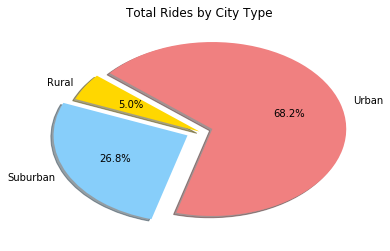

In [99]:
# Build Pie Chart
labels = ride_type_df["type"]
rides = ride_type_df["ride_id"]
# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0.1, 0.1)
plt.pie(rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Rides by City Type")
# Save Figure


## Total Drivers by City Type

In [47]:
#Create df to combine type and fare 
driver_type = merge_df.groupby('type')["driver_count"].sum().reset_index()
driver_type.head()

,type,driver_count
0,Rural,537
1,Suburban,8570
2,Urban,59602


Text(0.5,1,'Total Drivers by City Type')

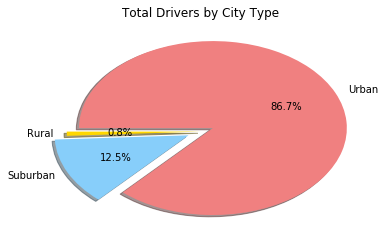

In [64]:
# Build Pie Charts
labels = driver_type["type"]
driver = driver_type["driver_count"]
# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0.1, 0.1)
plt.pie(driver, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("Total Drivers by City Type")
# Save Figure
